In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#pip install spectrum_utils

In [3]:
#pip install pyteomics

In [4]:
#!pip install rdkit

In [5]:
#!pip install seaborn==0.13.0

In [6]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs

In [7]:
import logging
from typing import Dict, IO, Iterator, Sequence, Union
from pyteomics import mgf
import pyteomics
from spectrum_utils.spectrum import MsmsSpectrum
import matplotlib.pyplot as plt
import spectrum_utils.plot as sup
import spectrum_utils as su
import numpy as np
from src.load_data import LoadData
from spectrum_utils import plot
from src.preprocessor import Preprocessor
from src.ml_model import MlModel
from src.tanimoto import Tanimoto
from sklearn.model_selection import train_test_split
from src.plotting import Plotting
import pickle
from src.cosine_distance import CosineDistance

In [8]:
from tqdm import tqdm

In [9]:
from src.spectrum_ext import SpectrumExt

In [10]:
from src.train_utils import TrainUtils
from sklearn.metrics import r2_score

In [11]:
pp =Preprocessor()

## Load data

In [12]:
import dill

# Load the dataset from the pickle file
with open('./dataset_processed.pkl', 'rb') as file:
    dataset = dill.load(file)

# Now you can access the original variables from the dataset dictionary
#all_spectrums_train = dataset['all_spectrums_train']
#all_spectrums_test = dataset['all_spectrums_test']
#molecule_pairs_train = dataset['molecule_pairs_train']
#molecule_pairs_test = dataset['molecule_pairs_test']

In [13]:
dataset.keys()

dict_keys(['all_spectrums_train', 'all_spectrums_test', 'molecule_pairs_train', 'molecule_pairs_val', 'molecule_pairs_test', 'uniformed_molecule_pairs_train', 'uniformed_molecule_pairs_val', 'uniformed_molecule_pairs_test'])

In [14]:
molecule_pairs_test=dataset['molecule_pairs_test']
uniformed_molecule_pairs_test = dataset['uniformed_molecule_pairs_test']

In [15]:
del(dataset)

## Compute similarity metrics

In [16]:
from src.deterministic_similarity import DetSimilarity

In [17]:
import dill

## Make a uniform data

In [18]:
complete_uniformed_molecule_pairs_test =TrainUtils.uniformise(molecule_pairs_test, number_bins=10)

In [19]:
complete_uniformed_molecule_pairs_test = TrainUtils.insert_spectrum_vector_into_molecule_pairs(complete_uniformed_molecule_pairs_test)

In [20]:
complete_uniformed_molecule_pairs_test = TrainUtils.insert_spectrum_vector_into_molecule_pairs(complete_uniformed_molecule_pairs_test)

In [ ]:
similarities, similarities_tanimoto = DetSimilarity.compute_all_scores(complete_uniformed_molecule_pairs_test)

In [ ]:
Plotting.plot_similarity_graphs(similarities, similarities_tanimoto)

Number of spectrum pairs with Tanimoto > 0.9: 69


C:\Users\ramir\projects\metabolomics_experiments\src\plotting.py:536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pair_classes["class"] = pair_classes[["class1", "class2"]].apply(
C:\Users\ramir\projects\metabolomics_experiments\src\plotting.py:660: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(
C:\Users\ramir\projects\metabolomics_experiments\src\plotting.py:660: FutureWarning: 

The `scale_hue` parameter has been replaced and will be removed in v0.15.0. Pass `common_norm=True` for the same effect.
  sns.violinplot(
C:\Users\ramir\projects\metabolomics_experiments\src\plotting.py:674: UserWarning: FixedFormatter should only be used toget

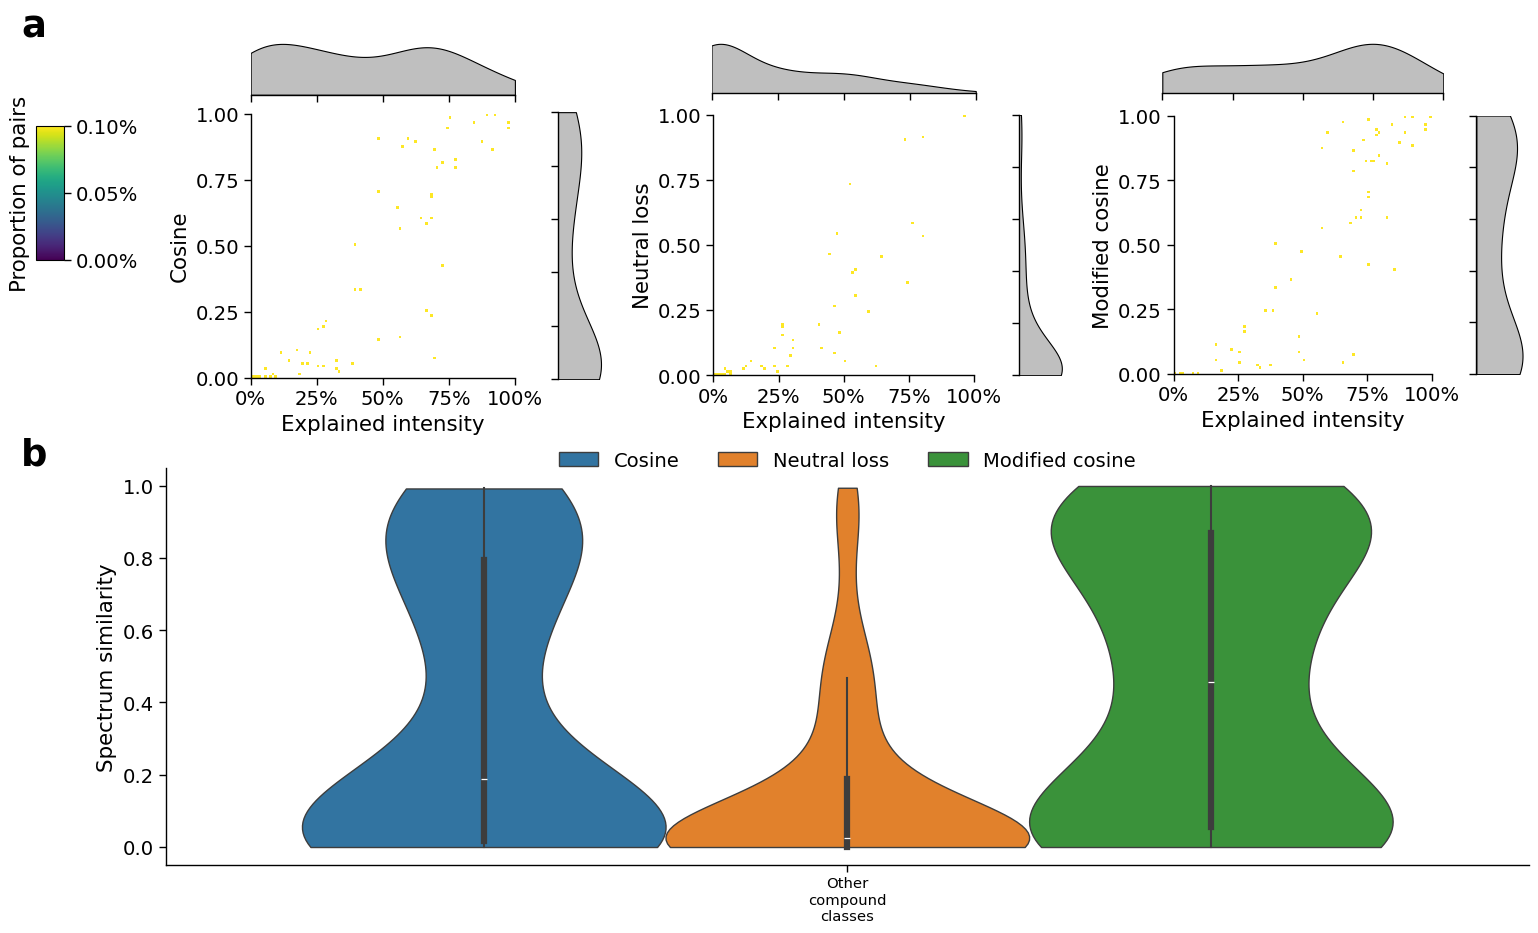

In [ ]:
Plotting.plot_gnps_libraries_tanimoto(similarities)